##### Loading the dataset

In [2]:
import pandas as pd
import numpy as np 


In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Data preprocessing and EDA:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#### checking for null values:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#checking for duplicate values in dataset:
df.duplicated().sum()

0

In [8]:
df.shape

(10000, 14)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
###now firstly removing non important columns :
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#unique values in each column.
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [13]:
## checking for data is balanced or not 
df['Exited'].value_counts()*100/sum(df['Exited'].value_counts())

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [14]:
#### extracting categorical and numerical columns:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [15]:
for col in cat_cols:
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


**Observations:**
* The dataset contains 10,000 rows with 14 columns.
* The size of the DataFrame is 1.1 MB.
* The dataset has no duplicate records or duplicate RowNumber/ CustomerId.
* There are no missing values in the dataset.
* There are 3 data types in the dataset:
  * int64 (9): RowNumber, CustomerId, CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited
  * object (3): Surname, Geography, Gender
  * float64 (2): Balance, EstimatedSalary
* The column Geography contains 3 unique values:
  * France - 5,014
  * Germany - 2,509
  * Spain - 2,477
* The column Gender contains 2 unique values:
  * Male - 5,457
  * Female - 4,543
* The column HasCrCard contains 2 unique values:
  * 1 - 7,055
  * 0 - 2,945
* The column IsActiveMember contains 2 unique values:
  * 1 - 5,151
  * 0 - 4,849
* The column Exited contains 2 unique values:
  * 0 - 7,963
  * 1 - 2,037

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Exited', ylabel='count'>

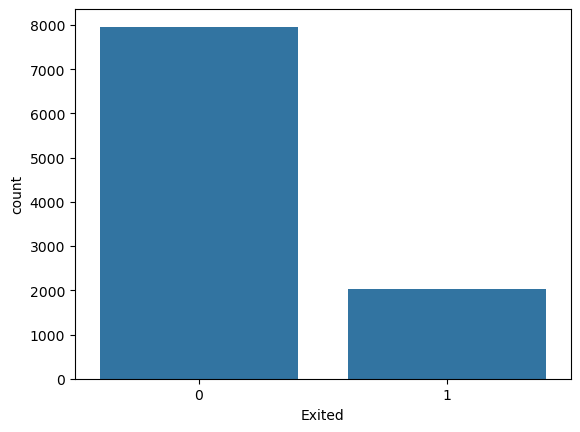

In [17]:
sns.countplot(x=df['Exited'])

In [18]:
#### checking the correlation between the numerical columns:
numeric_df=df.select_dtypes(include=[np.number])


<Axes: >

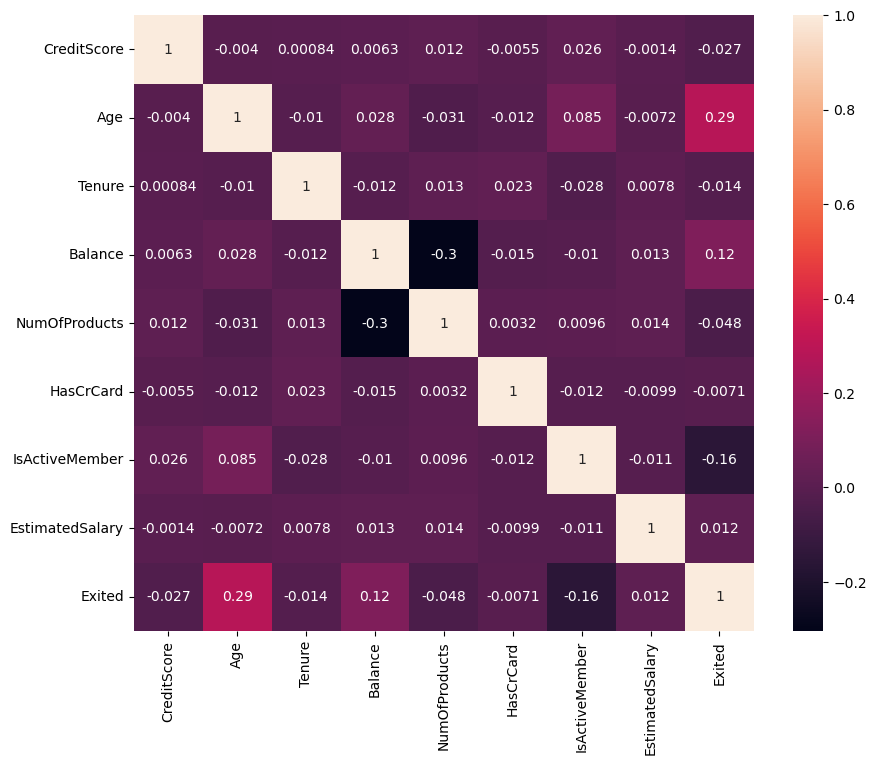

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True)

##### all have decent collinearity no multi collinearity exists no need to more changes .

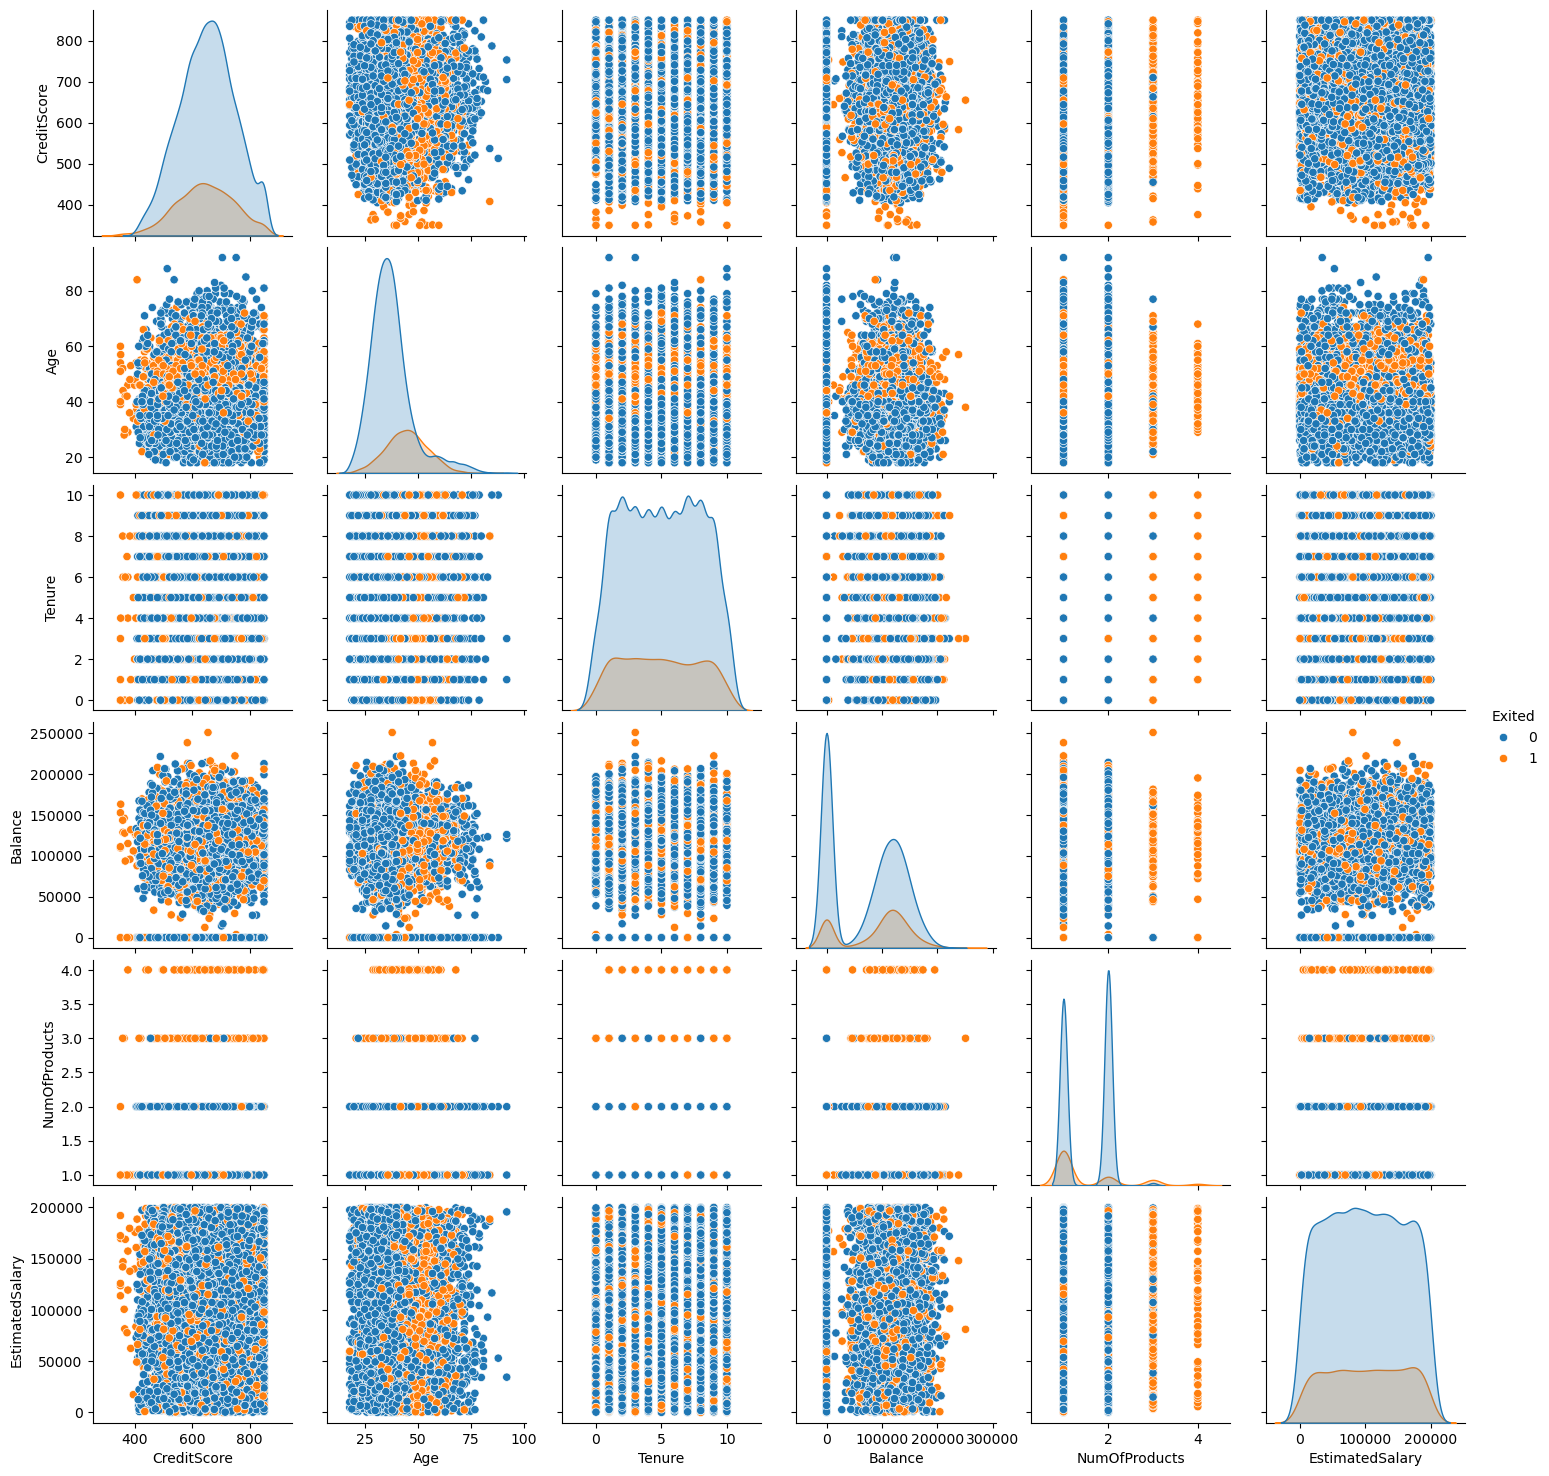

In [20]:
### plotting the pairplot 
sns.pairplot(df[num_cols+['Exited']],hue="Exited")

**Observations:**
* The orange spots are the customers who left (Exited = 1) while the blue spots are the existing customers (Exited = 0).
* All the numerical columns shows small correlation.

***Feature engineering***

In [21]:
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [22]:
cat_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### as we know that we applying differrent encoding techniques to our categorical columns to convert our object type columns into numeric form so they can easily scaled whenever required and here the categorical columns which is in object form is only two which we can easily encoded.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#### encoding the categorical column gender using label encoder.
lc=LabelEncoder()
lc

LabelEncoder()

In [26]:
df['Gender']=lc.fit_transform(df['Gender'])

In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [28]:
#### now encoding geography column using one hot encoder:
from sklearn.preprocessing import OneHotEncoder

In [29]:
oe=OneHotEncoder()

In [30]:
encoded_geo=oe.fit_transform(df[['Geography']])

In [31]:
encoded_geo

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [32]:
oe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [33]:
geo_encoded=pd.DataFrame(encoded_geo.toarray(),columns=oe.get_feature_names_out(['Geography']))

In [34]:
geo_encoded

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [35]:
###combining encoded data to original dataset;
df=pd.concat([df.drop('Geography',axis=1),geo_encoded],axis=1)

In [36]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [37]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [38]:
df.reindex(columns=['CreditScore','Geography_France', 'Geography_Germany','Geography_Spain','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'])

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1.0,0.0,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,608,0.0,0.0,1.0,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1.0,0.0,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1.0,0.0,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,850,0.0,0.0,1.0,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1.0,0.0,0.0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1.0,0.0,0.0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1.0,0.0,0.0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0.0,1.0,0.0,1,42,3,75075.31,2,1,0,92888.52,1


In [39]:
##saving the encoderers and scalers
import pickle
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(lc,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(oe,file)

#### Splitting the dataset:

In [40]:
###dividing the dataset
X=df.drop('Exited',axis=1)
y=df['Exited']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,632,1,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,561,0,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,517,1,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0
5191,682,0,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0
5390,735,0,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0
860,667,1,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0


In [44]:
X_train.shape

(8000, 12)

In [45]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [46]:
X_test.shape

(2000, 12)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
##scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
##saving the scaler model:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [50]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [51]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

##### all is done now we start building our model.

#### Model building:

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


##### Logistic regression:

In [53]:
# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [70]:
# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



##### random forest classifier:

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



#### Gradient  boosting:

In [63]:
from sklearn.ensemble import  GradientBoostingClassifier

In [64]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [65]:
gb

GradientBoostingClassifier(random_state=42)

In [66]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [68]:
# Make predictions
y_pred_gb = gb.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Now random forest perform best so we will dump this model.

In [71]:
with open('model.pkl','wb') as file:
    pickle.dump(rf,file)

In [ ]:
#done.